<a href="https://colab.research.google.com/github/SHIFAT-Arman/Machine-Learning/blob/log-reg/Logistic_Regression_with_real_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

In [51]:
data = pd.read_csv('titanic_train.csv')

In [52]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Information
- Embarked implies where the traveler mounted from. There are three possible values for Embark Southampton, Cherbourg, and Queenstown.
- SibSp is the number of siblings or spouse of a person onboard
- Parch is the feature contained the number of parents or children each passenger was touring with.

# Checking number of passenger died

In [53]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [54]:
data.drop(['PassengerId', 'Name', "Ticket", "Cabin"], axis=1, inplace=True)

In [55]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Checking for NULL values

In [56]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


# Replacing for NULL values
- "Age" with the mean value of "Age"
- Drop the samples of embarked with null values

In [57]:
data.fillna(value={'Age': data['Age'].mean()}, inplace=True)

In [58]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [59]:
data.dropna(inplace=True)

In [60]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [61]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Creating Dummy Variables
- Dropping Female column, only male column can detect
- Dropping first column to avoid multicollinearity in embark

In [62]:
sex = pd.get_dummies(data['Sex'], drop_first=True,dtype=int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [63]:
embark = pd.get_dummies(data['Embarked'], drop_first=True,dtype=int)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


# Adding Dummy Variables to original Data

In [64]:
data = pd.concat([data, sex, embark], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [65]:
data = data.drop(['Sex', 'Embarked'], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Extract Features and Labels

In [71]:
X = data.drop(['Survived'], axis = 1).values
X.shape

(889, 8)

In [67]:
y = data['Survived'].values

# Performing train test Split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
X_test.shape

(178, 8)

# Standardize the data

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying Logistic Regression

In [73]:
logreg = LogisticRegression()
LR = logreg.fit(X_train, y_train)

In [74]:
y_pred = LR.predict(X_test)

# Obeserving the probability table
- Probability class 0 : survived

In [78]:
y_pred_prob = LR.predict_proba(X_test).round(3)
y_pred_prob

array([[0.902, 0.098],
       [0.044, 0.956],
       [0.217, 0.783],
       [0.76 , 0.24 ],
       [0.039, 0.961],
       [0.898, 0.102],
       [0.718, 0.282],
       [0.871, 0.129],
       [0.072, 0.928],
       [0.033, 0.967],
       [0.627, 0.373],
       [0.419, 0.581],
       [0.962, 0.038],
       [0.878, 0.122],
       [0.905, 0.095],
       [0.9  , 0.1  ],
       [0.646, 0.354],
       [0.854, 0.146],
       [0.748, 0.252],
       [0.908, 0.092],
       [0.718, 0.282],
       [0.061, 0.939],
       [0.948, 0.052],
       [0.367, 0.633],
       [0.908, 0.092],
       [0.476, 0.524],
       [0.71 , 0.29 ],
       [0.116, 0.884],
       [0.488, 0.512],
       [0.728, 0.272],
       [0.473, 0.527],
       [0.293, 0.707],
       [0.908, 0.092],
       [0.428, 0.572],
       [0.967, 0.033],
       [0.654, 0.346],
       [0.225, 0.775],
       [0.255, 0.745],
       [0.854, 0.146],
       [0.908, 0.092],
       [0.862, 0.138],
       [0.433, 0.567],
       [0.7  , 0.3  ],
       [0.8

In [79]:
df = pd.DataFrame({"Probability_class_0": y_pred_prob[:, 0],
                   "Probability_class_1": y_pred_prob[:, 1],
                   "Class_Prediction": y_pred})
df.head()

,Probability_class_0,Probability_class_1,Class_Prediction
0,0.902,0.098,0
1,0.044,0.956,1
2,0.217,0.783,1
3,0.760,0.240,0
4,0.039,0.961,1


# Accuracy

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



# Confusion Matrix

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

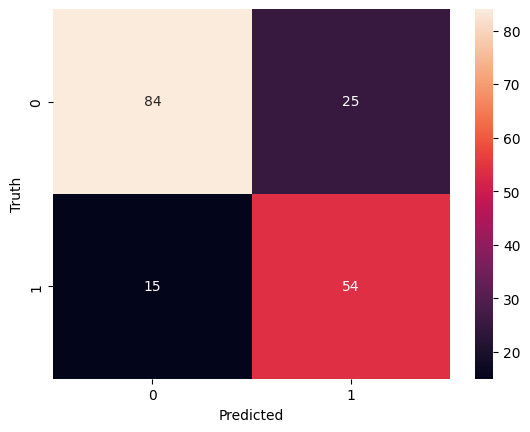

In [83]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# ROC Curve

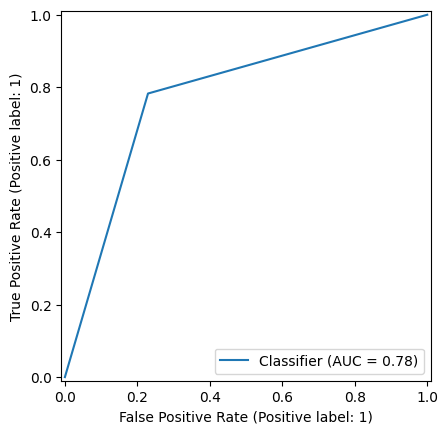

In [84]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(1,1)
RocCurveDisplay.from_predictions(y_test, y_pred, drop_intermediate=False, ax=ax)
plt.show()

# Calculating Bias and Weights of Log Reg Model

In [85]:
LR.intercept_

array([-0.66682264])

In [86]:
LR.coef_

array([[-0.95275165, -0.57522268, -0.44453955, -0.05521699,  0.07695288,
        -1.29209864, -0.02449023, -0.2343958 ]])